<a href="https://colab.research.google.com/github/stellagerantoni/MLChallenge/blob/main/traffic_lights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

In [ ]:
!ls "/content/drive/MyDrive/"

In [ ]:
!unzip "/content/drive/MyDrive/GTSRB-Training_fixed" -d "/content/"

In [5]:
import random as python_random
def reset_seeds(seed_value=39):
    # ref: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    # necessary for starting Numpy generated random numbers in a well-defined initial state.
    np.random.seed(seed_value)
    # necessary for starting core Python generated random numbers in a well-defined state.
    python_random.seed(seed_value)
    # set_seed() will make random number generation
    tf.random.set_seed(seed_value)

RANDOM_STATE = 39

In [23]:
#import zipfile
#import csv

train_images = []
train_labels = []
validation_images = []
validation_labels = []
test_images = []
test_labels = []
annotations=[]

In [7]:
root_folder = '/content/GTSRB/Training/'
dir_list_classes = sorted(os.listdir(root_folder))
for path in dir_list_classes[0:43]:
  dir_list_images = sorted(os.listdir(os.path.join(root_folder,path)))
  annotation = pd.read_csv(os.path.join(root_folder,path,dir_list_images[-1]),delimiter = ';')
  img_nb = 0
  for file in dir_list_images[:150]:
    img_path = os.path.join(root_folder,path)
    img = cv2.imread(os.path.join(img_path, file))

    x1 = annotation.loc[img_nb,'Roi.X1']
    y1 = annotation.loc[img_nb,'Roi.Y1']
    x2 = annotation.loc[img_nb,'Roi.X2']
    y2 = annotation.loc[img_nb,'Roi.Y2']

    cropped_img = img[y1:y2, x1:x2]

    resized_img = cv2.resize(cropped_img, (100, 100))
    train_images.append(resized_img)

    class_id = annotation.loc[img_nb,'ClassId']
    train_labels.append(class_id)
    img_nb +=1

In [24]:
# root_folder_test = '/content/drive/MyDrive/Final_Test/Images'
# root_folder_test_dir = sorted(os.listdir(root_folder_test))
# for path in root_folder_test_dir:
#     img_path = os.path.join(root_folder_test,path)
#     img = cv2.imread(os.path.join(img_path, file))
#     test_images.append(img)

In [25]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)
train_images = train_images/255.0
test_images = test_images/255.0
validation_images = validation_images/255.0

TypeError: ignored

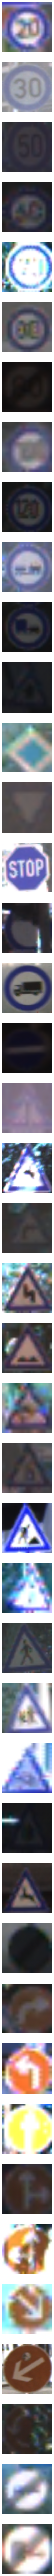

In [9]:
plt.figure(figsize=(60, 160))
count = 1
for j in range(train_images.shape[0]):
  if j %150 == 0:
    for i, image in enumerate(train_images[j:j+1]):
        plt.subplot(43, 1, count)
        plt.imshow(train_images[j])
        plt.axis('off')
        count += 1

plt.show()

In [10]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=RANDOM_STATE)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels)


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras

model = tf.keras.Sequential([
    (Conv2D(32,kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape = (100,100,3))),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(64,kernel_size=(3,3), padding = 'same', activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(128, kernel_size = (3,3), padding= 'same', activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Flatten()),
    (Dense(128, activation= 'relu')),
    (Dense(43, activation = 'softmax'))
])

In [12]:
from keras.utils import to_categorical

train_labels_categorical = to_categorical(y_train, num_classes = 43)
validation_labels_categorical = to_categorical(y_val, num_classes = 43)
test_labels_categorical = to_categorical(test_labels, num_classes = 43)

In [13]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
early_stopping_accuracy = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=15, restore_best_weights=True
)
reset_seeds()
classifier_history = model.fit(
    train_images,
    train_labels_categorical,
    epochs=150,
    batch_size=32,
    shuffle=True,
    verbose=True,
    validation_data=(validation_images, validation_labels_categorical),
    callbacks=[early_stopping_accuracy],
)

ValueError: ignored

##No need to plot training and test curves yet. The diffrence between the accuracy and the val_accuracy makes it clear that the model is overfitting.

In [ ]:
# Simpler model
model2 = tf.keras.Sequential([
    (Conv2D(16,kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape = (100,100,3))),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(32,kernel_size=(3,3), padding = 'same', activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(64, kernel_size = (3,3), padding= 'same', activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Flatten()),
    (Dense(64, activation= 'relu')),
    (Dense(43, activation = 'softmax'))
])

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
early_stopping_accuracy = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=15, restore_best_weights=True
)
reset_seeds()
classifier_history2 = model2.fit(
    train_images,
    train_labels_categorical,
    epochs=150,
    batch_size=32,
    shuffle=True,
    verbose=True,
    validation_data=(validation_images, validation_labels_categorical),
    callbacks=[early_stopping_accuracy],
)

##With Dropout

In [14]:
from tensorflow.keras.layers import Dropout
model3 = tf.keras.Sequential([
    (Conv2D(32,kernel_size=(3,3), activation = 'relu', input_shape = (100,100,3))),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(64,kernel_size=(3,3), activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Conv2D(128, kernel_size = (3,3), activation = 'relu')),
    (MaxPooling2D(pool_size = (2,2))),

    (Flatten()),
    (Dense(128, activation= 'relu')),
    (Dropout(0.5)),
    (Dense(43, activation = 'softmax'))
])

In [15]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
early_stopping_accuracy = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=15, restore_best_weights=True
)
reset_seeds()
classifier_history3 = model3.fit(
    X_train,
    train_labels_categorical,
    epochs=150,
    batch_size=128,
    shuffle=True,
    verbose=True,
    validation_data=(X_val, validation_labels_categorical),
    callbacks=[early_stopping_accuracy],
)

Epoch 1/150
41/41 [==============================] - 16s 86ms/step - loss: 3.7053 - accuracy: 0.0388 - val_loss: 3.5863 - val_accuracy: 0.1240
Epoch 2/150
41/41 [==============================] - 2s 51ms/step - loss: 3.4603 - accuracy: 0.1114 - val_loss: 3.1872 - val_accuracy: 0.2806
Epoch 3/150
41/41 [==============================] - 2s 43ms/step - loss: 3.0611 - accuracy: 0.2058 - val_loss: 2.5785 - val_accuracy: 0.4566
Epoch 4/150
41/41 [==============================] - 2s 47ms/step - loss: 2.5394 - accuracy: 0.3453 - val_loss: 2.0069 - val_accuracy: 0.5643
Epoch 5/150
41/41 [==============================] - 2s 43ms/step - loss: 2.1202 - accuracy: 0.4506 - val_loss: 1.5491 - val_accuracy: 0.6899
Epoch 6/150
41/41 [==============================] - 2s 47ms/step - loss: 1.7471 - accuracy: 0.5469 - val_loss: 1.2321 - val_accuracy: 0.7891
Epoch 7/150
41/41 [==============================] - 2s 47ms/step - loss: 1.4382 - accuracy: 0.6281 - val_loss: 0.9832 - val_accuracy: 0.8411
Epoch

ValueError: ignored

In [16]:
y_pred = model3.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
acc = balanced_accuracy_score(y_true=y_val, y_pred=y_pred_classes)
print(f"Classifier trained, with validation accuracy {acc}.")

41/41 [==============================] - 0s 4ms/step
Classifier trained, with validation accuracy 0.9930232558139536.


41/41 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9930
Test accuracy: 0.9930232763290405


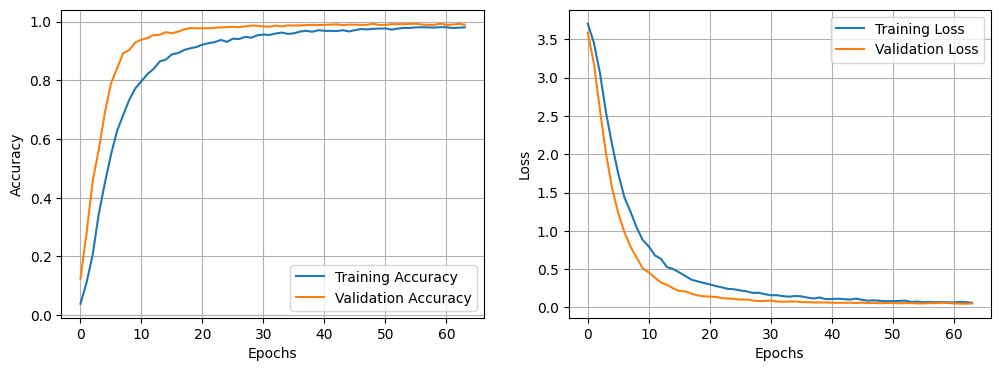

In [29]:
test_loss, test_accuracy = model3.evaluate(X_val, validation_labels_categorical)
print(f'Test accuracy: {test_accuracy}')

# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(classifier_history3.history['accuracy'], label='Training Accuracy')
plt.plot(classifier_history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(classifier_history3.history['loss'], label='Training Loss')
plt.plot(classifier_history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()